<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/machine_learning/exp/Random_forest_Modular_Correct(Daily_New).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [978]:
#! git clone https://github.com/anirbanghoshsbi/pandas-technical-indicators.git

In [979]:
!pwd

/content/pandas-technical-indicators


In [980]:
#%cd pandas-technical-indicators

In [981]:
!pip install yfinance
!pip install pykalman

In [982]:
# Import libraries
import os
import sys
import requests
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from pykalman import KalmanFilter

In [983]:
import technical_indicators as ta
import random_forest as rf
import confusionMatrix as cm
import easy_line_ploting as linplt

In [984]:
tickr ='^nsei'   #'^NSEI' #^NSEBANK  #^cnxit #^GSPC #^YHOH714

STARTDATE='2015-01-01'
ENDDATE='2020-03-01'
START_TESTDATE='2020-05-25'

In [985]:
df= yf.download(tickr,start=STARTDATE,end=ENDDATE)


[*********************100%***********************]  1 of 1 completed


In [986]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean_close, _ = f.filter(df['Adj Close'].values)
mean_close= mean_close.squeeze()

In [987]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean_open, _ = f.filter(df['Open'].values)
mean_open= mean_open.squeeze()

In [988]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean_high, _ = f.filter(df['High'].values)
mean_high= mean_high.squeeze()

In [989]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean_low, _ = f.filter(df['Low'].values)
mean_low= mean_low.squeeze()

In [990]:
df_old= pd.DataFrame({'Open':(df['Open'].values - mean_open),'High':(df['High'].values - mean_high),'Low':(df['Low'].values - mean_low),'Close':(df['Adj Close'].values - mean_close),'Volume':df['Volume']})

# INPUT

In [991]:
# INPUT .........

#  ********************************* #

t=8
days_out=90


#  ********************************* #

In [992]:
def get_indicators(data ,days_out,t=2):
    data = ta.relative_strength_index(data,days_out)
    #data=ta.exponential_moving_average(data,10*t)
    #data=ta.exponential_moving_average(data,50*t)
    data=ta.momentum(data,7*t)
    data=ta.rate_of_change(data,7*t)
    #data=ta.exponential_moving_average(data,7*t)
    
    #data=ta.exponential_moving_average(data , 10*t)
    #data=ta.exponential_moving_average(data ,20*t)
    #data=ta.force_index(data ,days_out)
    data = ta.on_balance_volume(data , days_out)
    data = ta.standard_deviation(data , days_out)
    data = ta.stochastic_oscillator_d(data ,days_out)
    data = ta.stochastic_oscillator_k(data)
    data = ta.macd(data , 24 , 50)
    #data = ta.ppsr(data)
    #data = ta.trix(data,days_out)
    data = ta.vortex_indicator(data , days_out)
    #data = ta.find_window_high_low(data,days_out)
    #data = ta.keltner_channel(data , 13)
    #data['change_in_price'] = data['Close'].diff()
    
    return data


In [993]:
df_old.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,4144.350098,4205.299805,4144.350098,4197.725098,101900
2015-01-05,2842.210584,2826.678091,2812.846006,2786.931067,118200


# Check This For Weekly or Daily 

In [994]:
############################ Comment or Uncomment Based on Daily or Weekly ##########

#df_old=df_old.resample('W').last()

In [995]:
train=int(len(df_old)*.75)
df_train= df_old[:train]
df_test= df_old[train+50:]

In [996]:
df_train.shape , df_test.shape

((948, 5), (266, 5))

In [997]:
df_train = get_indicators(df_train,days_out,t)
df_test= get_indicators(df_test,days_out,t)

In [998]:
df_old.tail(2)

,Open,High,Low,Close,Volume
Date,,,,,
2020-02-27,-67.560009,-112.099220,-120.305782,-80.730945,608600
2020-02-28,-343.359206,-387.257043,-477.160648,-507.183492,809900


In [999]:
# create a new column that will house the flag, and for each group calculate the diff compared to 30 days ago. Then use Numpy to define the sign.
df_train['Signal_Flag'] = df_train['Close'].transform(lambda x : np.sign(x.diff(days_out)))

df_train = df_train.dropna()

In [1000]:
# create a new column that will house the flag, and for each group calculate the diff compared to 30 days ago. Then use Numpy to define the sign.
df_test['Signal_Flag'] = df_test['Close'].transform(lambda x : np.sign(x.diff(days_out)))

df_test = df_test.dropna()

In [1001]:
df_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'RSI_90', 'Momentum_56',
       'ROC_56', 'OBV_90', 'STD_90', 'SO%d_90', 'SO%k', 'MACD_24_50',
       'MACDsign_24_50', 'MACDdiff_24_50', 'Vortex_90', 'Signal_Flag'],
      dtype='object')

In [1002]:
X_train = df_train.drop(['Open','High','Low','Close','Signal_Flag'],axis=1)
y_train = df_train['Signal_Flag']
X_test = df_test.drop(['Open','High','Low','Close','Signal_Flag'],axis=1)
y_test = df_test['Signal_Flag']

In [1003]:
############## JUST REMOVE # TO COMPUTE THE BEST PARAMETERS #######################

#rf.best_param_rf(X_train , y_train , 100)

In [1004]:
'''
{'Best Score': 0.9214365881032548,
 'Best parameters': {'bootstrap': False,
  'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': None,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 12,
  'min_samples_split': 10,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 200,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False}}
  '''

"\n{'Best Score': 0.9214365881032548,\n 'Best parameters': {'bootstrap': False,\n  'ccp_alpha': 0.0,\n  'class_weight': None,\n  'criterion': 'gini',\n  'max_depth': 10,\n  'max_features': None,\n  'max_leaf_nodes': None,\n  'max_samples': None,\n  'min_impurity_decrease': 0.0,\n  'min_samples_leaf': 12,\n  'min_samples_split': 10,\n  'min_weight_fraction_leaf': 0.0,\n  'n_estimators': 200,\n  'n_jobs': None,\n  'oob_score': False,\n  'random_state': None,\n  'verbose': 0,\n  'warm_start': False}}\n  "

In [1005]:
# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators = 200,max_depth=10,min_samples_leaf=12,class_weight=None,max_features='log2',min_samples_split=10, criterion = "gini", bootstrap=True,random_state = 42)
# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(X_test)
# class_weight={-1:1.25,1:1},

In [1006]:
y_train.value_counts()

-1.0    441
 1.0    417
Name: Signal_Flag, dtype: int64

In [1007]:
# Print the Accuracy of our Model.
print('Correct Prediction RForest (%): ', f1_score(y_test, rand_frst_clf.predict(X_test), average='macro') * 100.0)

Correct Prediction RForest (%):  81.96184745594604


Accuracy: 82.38636363636364
Percision: 82.6923076923077
Recall: 86.86868686868688
Specificity: 76.62337662337663


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


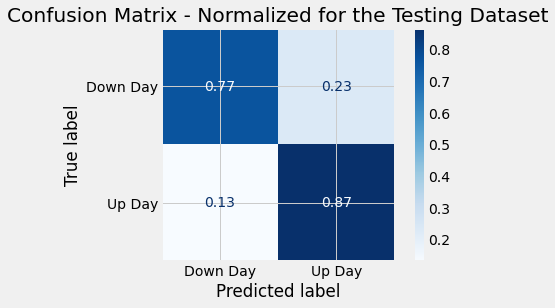

In [1008]:
cm.confus_matrix(y_test,y_pred,rand_frst_clf,X_test,y_test,plot=True )

#cm.confus_matrix(actual_results , predictions,model ,<test data ( or new_data for prediction except target VAR)>, <actaul Target VAR> , <plot=True>)

In [1009]:
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp*100
feats=X_train.columns

# Logistic Regression

In [1010]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [1011]:
LogReg = LogisticRegression()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
LogReg.fit(X_train, y_train)
y_predL = LogReg.predict(X_test)

In [1012]:
# Print the Accuracy of our Model.
print('Correct Prediction Logistic Regression (%): ', f1_score(y_test, LogReg.predict(X_test), average='macro') * 100.0)

Correct Prediction Logistic Regression (%):  77.19911905687266


Accuracy: 77.27272727272727
Percision: 83.9080459770115
Recall: 73.73737373737373
Specificity: 81.81818181818183


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


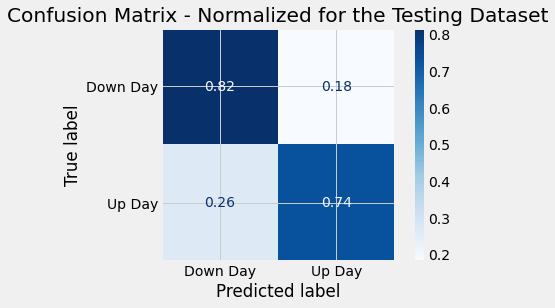

In [1013]:
cm.confus_matrix(y_test,y_predL,LogReg,X_test,y_test,plot=True )

# Support Vector Classifier

In [1014]:
from sklearn.svm import SVC
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)
y_predS = svc_classifier.predict(X_test)

In [1015]:
# Print the Accuracy of our Model.
print('Correct Prediction Logistic Regression (%): ', f1_score(y_test, svc_classifier.predict(X_test), average='macro') * 100.0)

Correct Prediction Logistic Regression (%):  74.41116603663855


Accuracy: 74.43181818181817
Percision: 82.92682926829268
Recall: 68.68686868686868
Specificity: 81.81818181818183


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


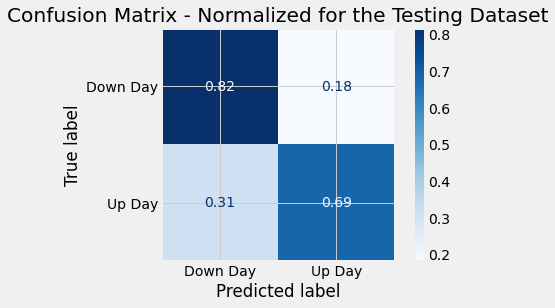

In [1016]:
cm.confus_matrix(y_test,y_predS,svc_classifier,X_test,y_test,plot=True )

# XGBoost Classifier

In [1017]:
import xgboost as xgb

In [1018]:
'''
param_test1 = {
 'max_depth':range(3,6,2),'learning_rate':[0.001,0.01,0.1],
 'min_child_weight':range(1,4,2),'reg_alpha':[0, 0.001, 0.005, 0.01],'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,85,5)],'gamma':[i/10.0 for i in range(0,2)],
 'n_estimators': [100,200,300]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=1e-5,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,verbose=2,cv=5)
 
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_
'''

"\nparam_test1 = {\n 'max_depth':range(3,6,2),'learning_rate':[0.001,0.01,0.1],\n 'min_child_weight':range(1,4,2),'reg_alpha':[0, 0.001, 0.005, 0.01],'subsample':[i/100.0 for i in range(75,90,5)],\n 'colsample_bytree':[i/100.0 for i in range(75,85,5)],'gamma':[i/10.0 for i in range(0,2)],\n 'n_estimators': [100,200,300]\n}\ngsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,\n min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=1e-5,\n objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), \n param_grid = param_test1, scoring='roc_auc',n_jobs=4,verbose=2,cv=5)\n \ngsearch1.fit(X_train,y_train)\ngsearch1.best_params_, gsearch1.best_score_\n"

In [1019]:
'''
({'colsample_bytree': 0.75,
  'gamma': 0.0,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 1,
  'n_estimators': 100,
  'reg_alpha': 0.01,
  'subsample': 0.75},
 0.9806766917293235)
'''

"\n({'colsample_bytree': 0.75,\n  'gamma': 0.0,\n  'learning_rate': 0.1,\n  'max_depth': 3,\n  'min_child_weight': 1,\n  'n_estimators': 100,\n  'reg_alpha': 0.01,\n  'subsample': 0.75},\n 0.9806766917293235)\n"

In [1020]:
xgb_classifier = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=3,
 min_child_weight=1,
 reg_alpha= 0.01,
 gamma=0,
 colsample_bytree= 0.75,
 subsample=0.75,
 objective= 'binary:logistic',
 seed=27)
xgb_classifier.fit(X_train, y_train)
y_predX = xgb_classifier.predict(X_test)
print("Accuracy for XGBoost Model: %.2f" % (f1_score(y_test, y_predX) * 100))

Accuracy for XGBoost Model: 78.31


Accuracy: 76.70454545454545
Percision: 82.22222222222221
Recall: 74.74747474747475
Specificity: 79.22077922077922


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


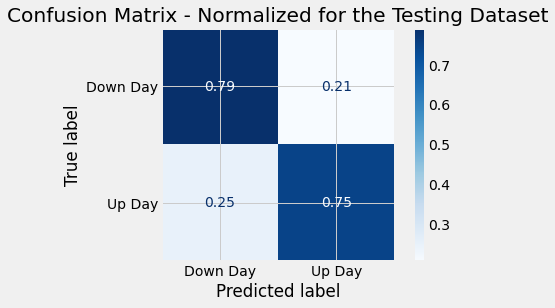

In [1021]:
cm.confus_matrix(y_test,y_predX,xgb_classifier,X_test,y_test,plot=True )

In [1022]:
feature_imp_XGB = pd.Series(xgb_classifier.feature_importances_, index=feats).sort_values(ascending=False)
feature_imp_XGB*100

OBV_90            34.307266
MACD_24_50        16.721220
RSI_90            12.445936
STD_90            10.604434
SO%d_90            5.484163
MACDdiff_24_50     4.465753
MACDsign_24_50     3.556952
Vortex_90          3.404050
ROC_56             2.475167
SO%k               2.396967
Momentum_56        2.279782
Volume             1.858306
dtype: float32

In [1023]:
features = {'Random Forest' : feature_imp,'XGBoost': feature_imp_XGB}
feats=pd.DataFrame(features)

In [1024]:
feats.sort_values(by=['XGBoost'],ascending=False)

,Random Forest,XGBoost
OBV_90,0.317422,0.343073
MACD_24_50,0.144402,0.167212
RSI_90,0.236999,0.124459
STD_90,0.051703,0.106044
SO%d_90,0.036307,0.054842
MACDdiff_24_50,0.012833,0.044658
MACDsign_24_50,0.079773,0.035570
Vortex_90,0.035672,0.034040
ROC_56,0.014410,0.024752
SO%k,0.002405,0.023970


# Make Actual Prediction

In [1025]:
df = yf.download(tickr,start=START_TESTDATE)

[*********************100%***********************]  1 of 1 completed


In [1026]:
df_price=df.copy()

In [1027]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean_close, _ = f.filter(df['Adj Close'].values)
mean_close= mean_close.squeeze()

f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean_open, _ = f.filter(df['Open'].values)
mean_open= mean_open.squeeze()

f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean_high, _ = f.filter(df['High'].values)
mean_high= mean_high.squeeze()

f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean_low, _ = f.filter(df['Low'].values)
mean_low= mean_low.squeeze()

In [1028]:
df= pd.DataFrame({'Open':(df['Open'].values - mean_open),'High':(df['High'].values - mean_high),'Low':(df['Low'].values - mean_low),'Close':(df['Adj Close'].values - mean_close),'Volume':df['Volume']})

# Check This For Weekly or Daily

In [1029]:
####################### Comment or Uncomment Based on Weekly or Daily ##################
#df=df.resample('W').last()

In [1030]:
df = get_indicators(df,days_out,t)
#df= impulse(df)

In [1031]:
df.tail(2)

,Open,High,Low,Close,Volume,RSI_90,Momentum_56,ROC_56,OBV_90,STD_90,SO%d_90,SO%k,MACD_24_50,MACDsign_24_50,MACDdiff_24_50,Vortex_90
Date,,,,,,,,,,,,,,,,
2021-12-21,437.952376,527.613896,471.935391,459.135148,241000,0.345289,-1932.277491,-0.798213,-22147.777778,602.056451,-0.626096,-0.229896,-355.742635,-313.311394,-42.431241,-0.347026
2021-12-22,525.071756,556.615240,597.179146,637.324741,0,0.348961,-1638.017220,-0.705951,-19060.000000,616.835572,-0.634088,-0.989688,-360.630668,-322.775249,-37.855419,-0.343313


In [1032]:
df_old.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,4144.350098,4205.299805,4144.350098,4197.725098,101900
2015-01-05,2842.210584,2826.678091,2812.846006,2786.931067,118200


In [1033]:
# create a new column that will house the flag, and for each group calculate the diff compared to 30 days ago. Then use Numpy to define the sign.
df['Signal_Flag'] = df['Close'].transform(lambda x : np.sign(x.diff(days_out)))

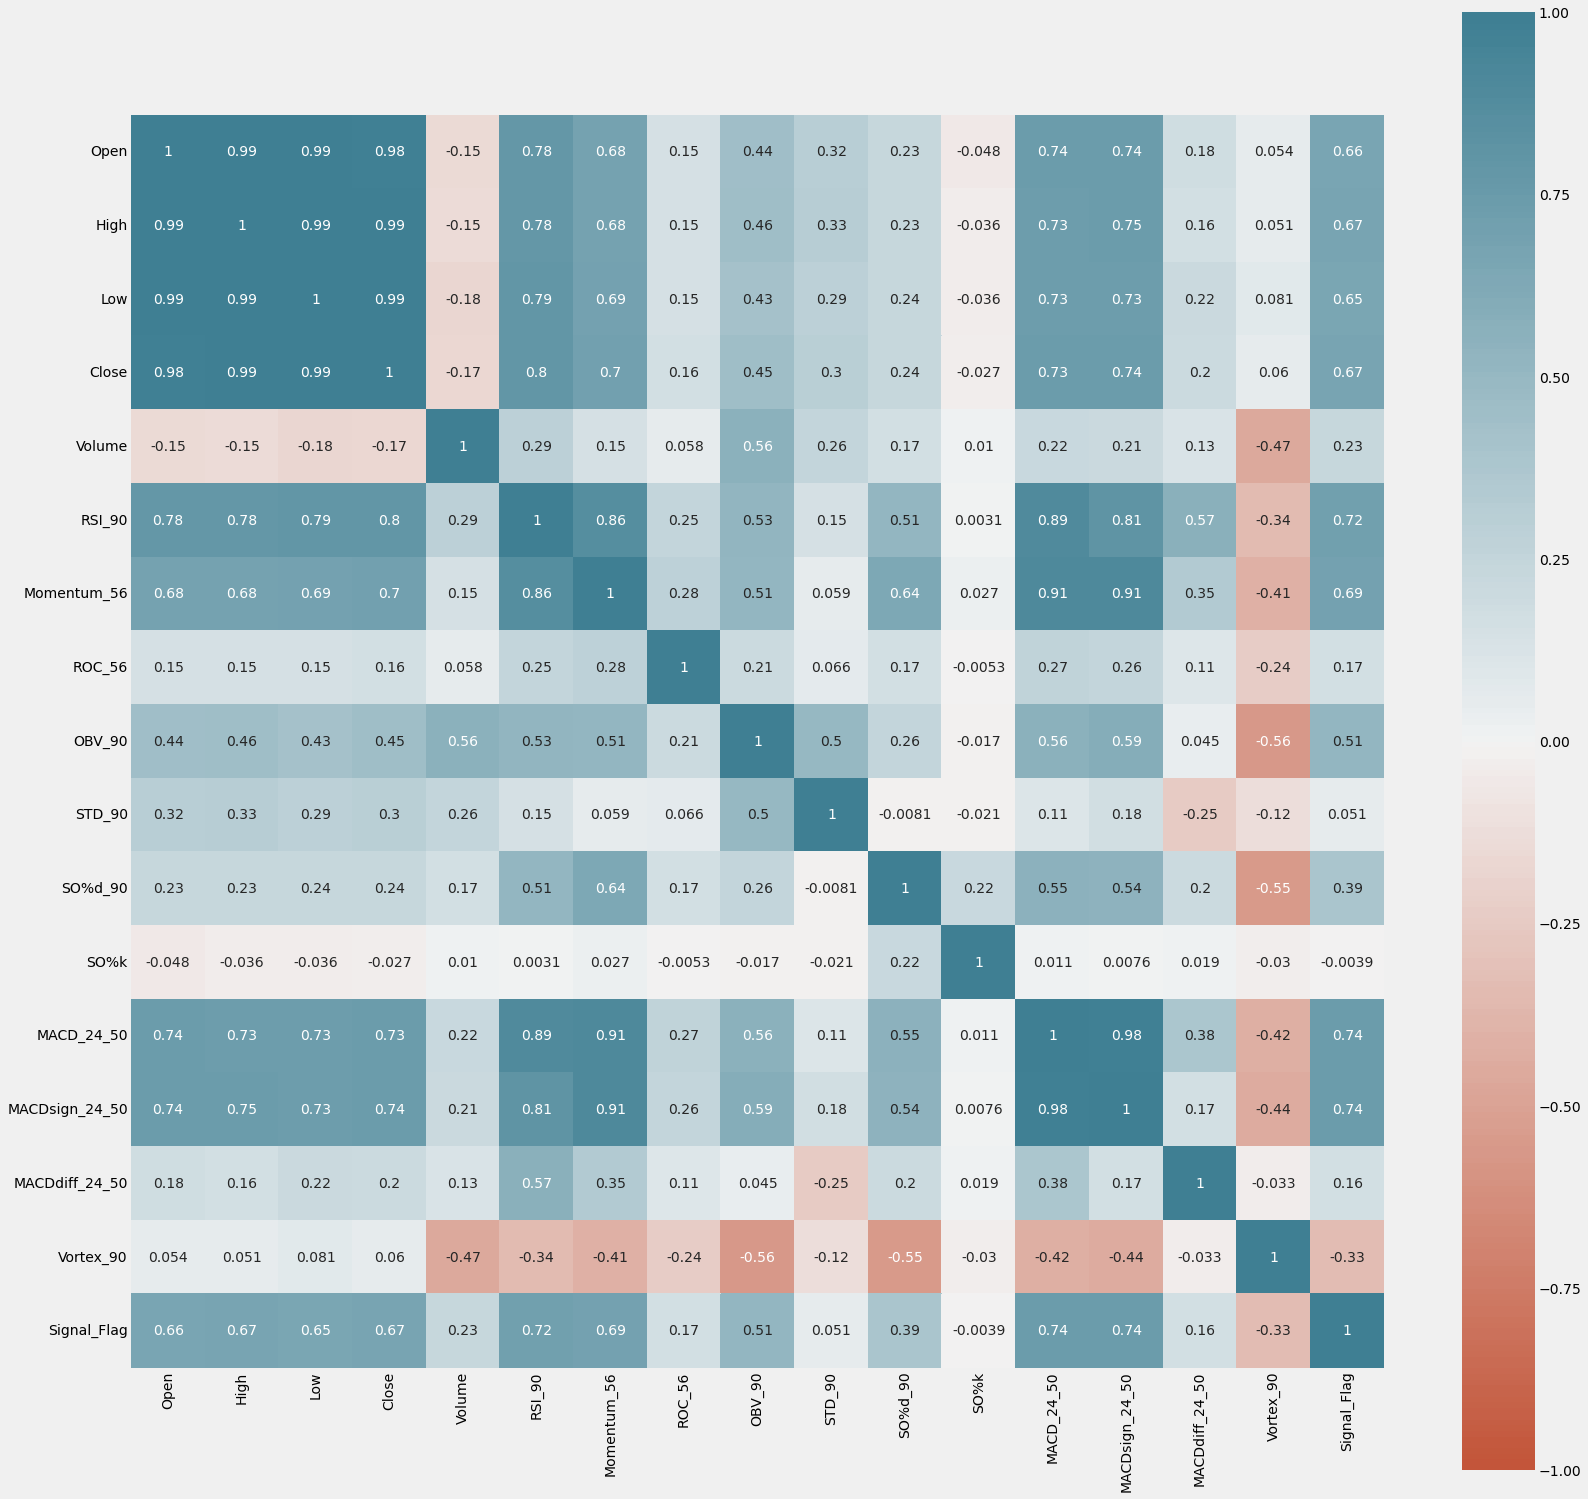

In [1034]:
ta.correlation_map(df,25)

In [1035]:
df.shape

(394, 17)

In [1036]:
df=df.dropna()

In [1037]:
df.shape

(304, 17)

In [1038]:
new_data = df.drop(['Open','High','Low','Close','Signal_Flag'],axis=1)
actuals= df['Signal_Flag']


# Make Predictions Using Random Forest

In [1039]:
model='random_forest'

In [1040]:
preds=rf.make_preds(new_data ,rand_frst_clf,model,df)

In [1041]:
print("days_out : ",days_out)

days_out :  90


In [1042]:
preds.head(2)

,predsrandom_forest
Date,
2020-09-29,-1.0
2020-09-30,-1.0


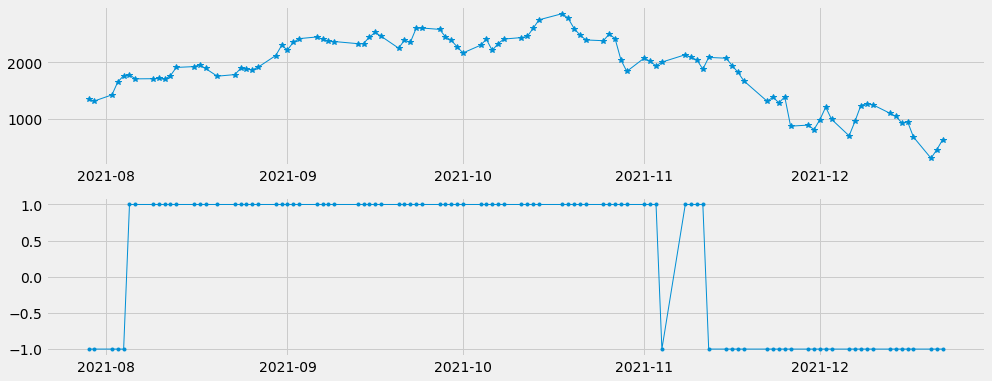

In [1043]:
linplt.lineplot(2,15,6,df,preds['predsrandom_forest'], no_of_datapoints=100) # no_of_datapoints=100

In [1044]:
pred = pd.DataFrame(rf.make_preds(new_data , rand_frst_clf, model,df))

In [1045]:
pred.head(2)

,predsrandom_forest
Date,
2020-09-29,-1.0
2020-09-30,-1.0


In [1046]:
pred = pd.concat([pred ,df.Close],axis=1)
#pred.columns=['Date','preds','Close']
#pred= pred.set_index('Date')

In [1047]:
l= len(pred)

In [1048]:
#fig, ax = plt.subplots(1,1,figsize=(20,7))
#Identifying the buy/sell zone
pred['Buy_ind'] = np.where((pred['predsrandom_forest']==1), 1, 0)
pred['Sell_ind'] = np.where((pred['predsrandom_forest']==-1), 0, 1)

In [1049]:
pred=pred.reset_index()

# Make Prediction Using XGBoost

In [1050]:
model='_XGB'

In [1051]:
predX=rf.make_preds(new_data.values ,xgb_classifier,model,df)

In [1052]:
predX= pd.concat([predX ,df.Close],axis=1)

In [1053]:
predX.head(2)

,preds_XGB,Close
Date,,
2020-09-29,-1.0,431.304965
2020-09-30,-1.0,450.229396


In [1054]:
#Identifying the buy/sell zone
predX['Buy_ind_XGB'] = np.where((predX['preds_XGB']==1), 1, 0)
predX['Sell_ind_XGB'] = np.where((predX['preds_XGB']==-1), 0, 1)

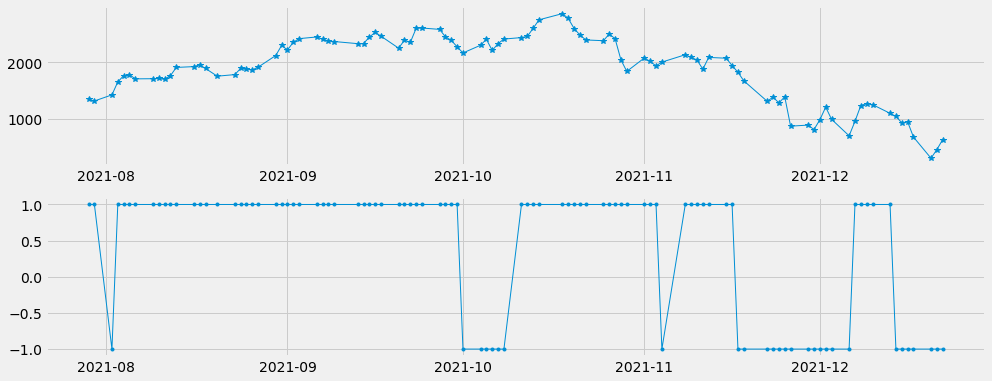

In [1055]:
linplt.lineplot(2,15,6,df,predX['preds_XGB'], no_of_datapoints=100) # no_of_datapoints=100

In [1056]:
predX=predX.reset_index()

# Make Prediction Using Logistics Regression

In [1057]:
model='_Logistic_Regression'

In [1058]:
preds_logreg=pd.DataFrame(rf.make_preds(new_data , LogReg,model, df))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [1059]:
preds_logreg.head(2)

,preds_Logistic_Regression
Date,
2020-09-29,-1.0
2020-09-30,-1.0


In [1060]:
predL = pd.concat([preds_logreg ,df.Close],axis=1)

In [1061]:
predL=predL.reset_index()

In [1062]:
#Identifying the buy/sell zone
predL['Buy_ind_Logreg'] = np.where((predL['preds_Logistic_Regression']==1), 1, 0)
predL['Sell_ind_Logreg'] = np.where((predL['preds_Logistic_Regression']==-1), 0, 1)

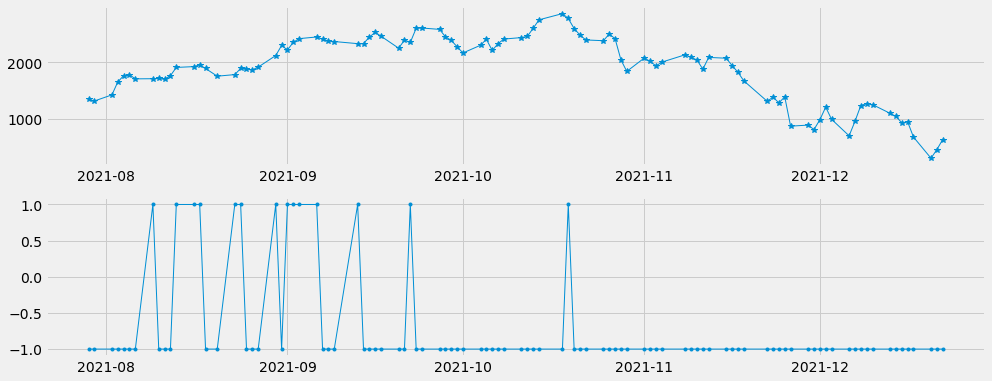

In [1063]:
linplt.lineplot(2,15,6,df,preds_logreg['preds_Logistic_Regression'], no_of_datapoints=100) # no_of_datapoints=100

# Make Predictions using Support Vector Classifier

In [1064]:
model='_SVC'

In [1065]:
preds_svc=pd.DataFrame(rf.make_preds(new_data ,svc_classifier,model, df))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [1066]:
predS = pd.concat([preds_svc,df.Close],axis=1)

In [1067]:
predS=predS.reset_index()

In [1068]:
#Identifying the buy/sell zone
predS['Buy_ind_SVC'] = np.where((predS['preds_SVC']==1), 1, 0)
predS['Sell_ind_SVC'] = np.where((predS['preds_SVC']==-1), 0, 1)

# PREDICTIONS

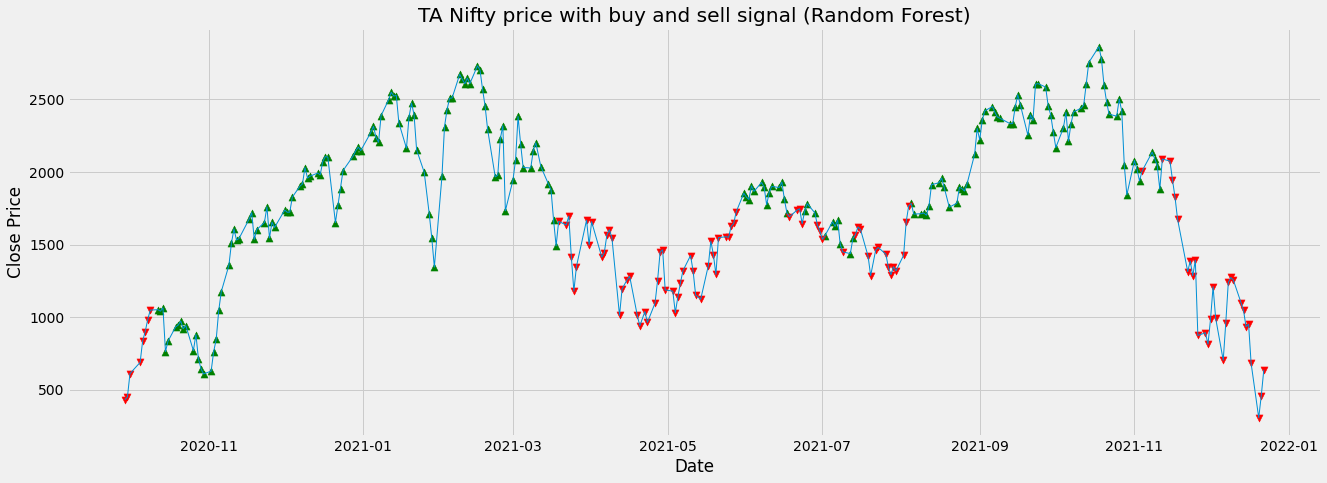

In [1069]:
plt.figure(figsize=(20,7))
## plotting the buy and sell signals on graph
plt.plot(df.index.values[-l:],df['Close'].values[-l:],'-',linewidth=1)
plt.scatter(pred.loc[pred['Buy_ind'] ==1 , 'Date'].values,pred.loc[pred['Buy_ind'] ==1, 'Close'].values, label='skitscat', color='green', s=50, marker="^")
plt.scatter(pred.loc[pred['Sell_ind'] ==0 , 'Date'].values,pred.loc[pred['Sell_ind'] ==0, 'Close'].values, label='skitscat', color='red', s=50, marker="v")

## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('TA Nifty price with buy and sell signal (Random Forest)') 

plt.savefig('a.png')
plt.show();

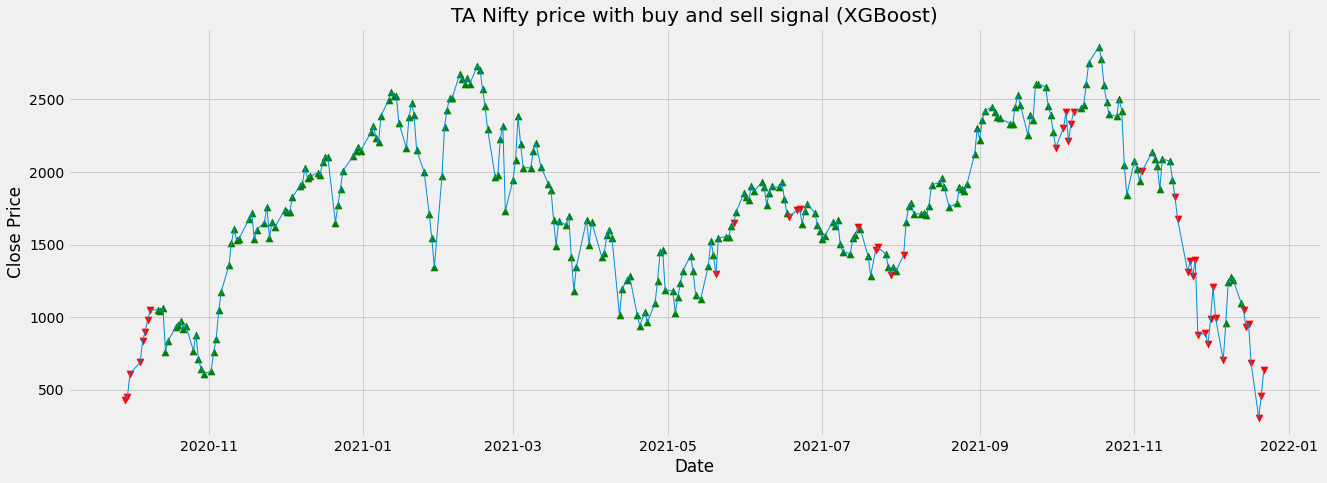

In [1070]:
plt.figure(figsize=(20,7))
## plotting the buy and sell signals on graph
plt.plot(df.index.values[-l:],df['Close'].values[-l:],'-',linewidth=1)
plt.scatter(predX.loc[predX['Buy_ind_XGB'] ==1 , 'Date'].values,predX.loc[predX['Buy_ind_XGB'] ==1, 'Close'].values, label='skitscat', color='green', s=50, marker="^")
plt.scatter(predX.loc[predX['Sell_ind_XGB'] ==0 , 'Date'].values,predX.loc[predX['Sell_ind_XGB'] ==0, 'Close'].values, label='skitscat', color='red', s=50, marker="v")

## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('TA Nifty price with buy and sell signal (XGBoost)') 

plt.savefig('a.png')
plt.show();

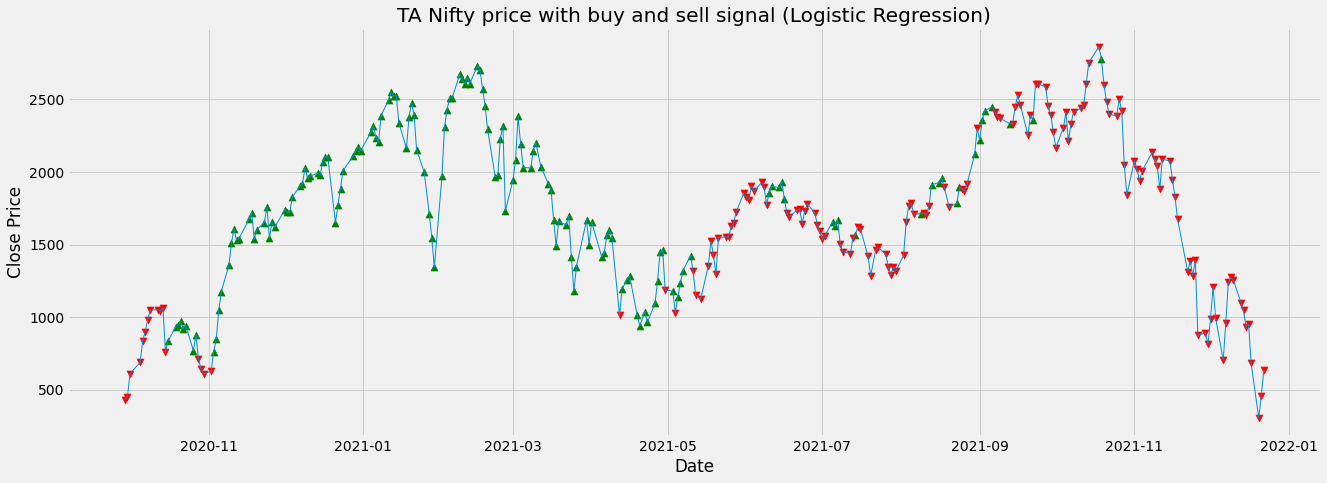

In [1071]:
plt.figure(figsize=(20,7))
## plotting the buy and sell signals on graph
plt.plot(df.index.values[-l:],df['Close'].values[-l:],'-',linewidth=1)
plt.scatter(predL.loc[predL['Buy_ind_Logreg'] ==1 , 'Date'].values,predL.loc[predL['Buy_ind_Logreg'] ==1, 'Close'].values, label='skitscat', color='green', s=50, marker="^")
plt.scatter(predL.loc[predL['Sell_ind_Logreg'] ==0 , 'Date'].values,predL.loc[predL['Sell_ind_Logreg'] ==0, 'Close'].values, label='skitscat', color='red', s=50, marker="v")

## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('TA Nifty price with buy and sell signal (Logistic Regression)') 

plt.savefig('a.png')
plt.show();

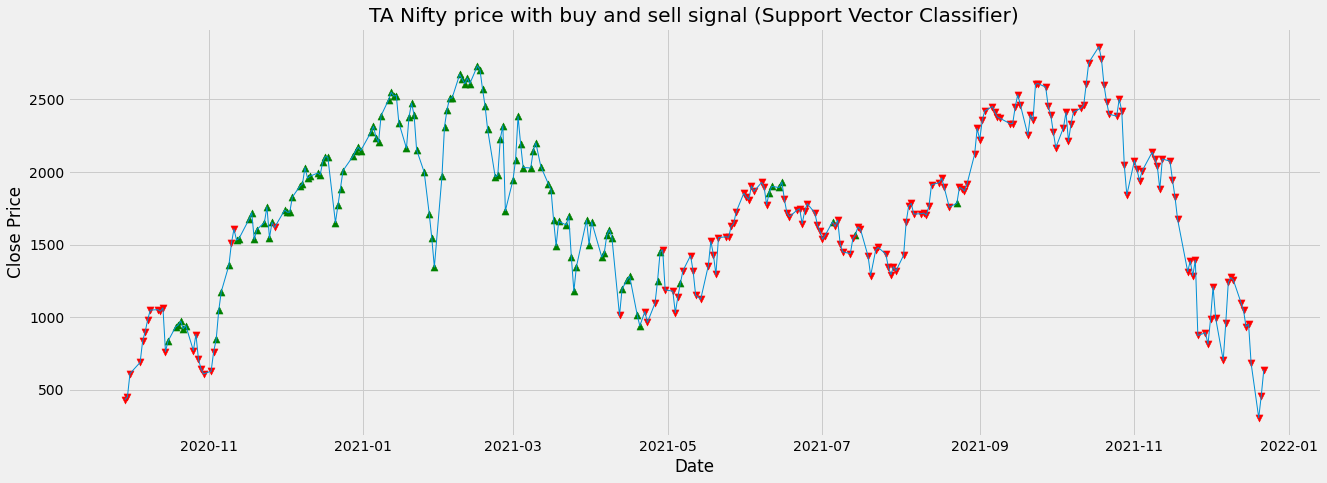

In [1072]:
plt.figure(figsize=(20,7))
## plotting the buy and sell signals on graph
plt.plot(df.index.values[-l:],df['Close'].values[-l:],'-',linewidth=1)
plt.scatter(predS.loc[predS['Buy_ind_SVC'] ==1 , 'Date'].values,predS.loc[predS['Buy_ind_SVC'] ==1, 'Close'].values, label='skitscat', color='green', s=50, marker="^")
plt.scatter(predS.loc[predS['Sell_ind_SVC'] ==0 , 'Date'].values,predS.loc[predS['Sell_ind_SVC'] ==0, 'Close'].values, label='skitscat', color='red', s=50, marker="v")

## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('TA Nifty price with buy and sell signal (Support Vector Classifier)') 

plt.savefig('a.png')
plt.show();

In [1073]:
pred['ensemble'] = pred['predsrandom_forest']*1+predL['preds_Logistic_Regression']*0.5+predS['preds_SVC']*0.5+predX['preds_XGB']*1

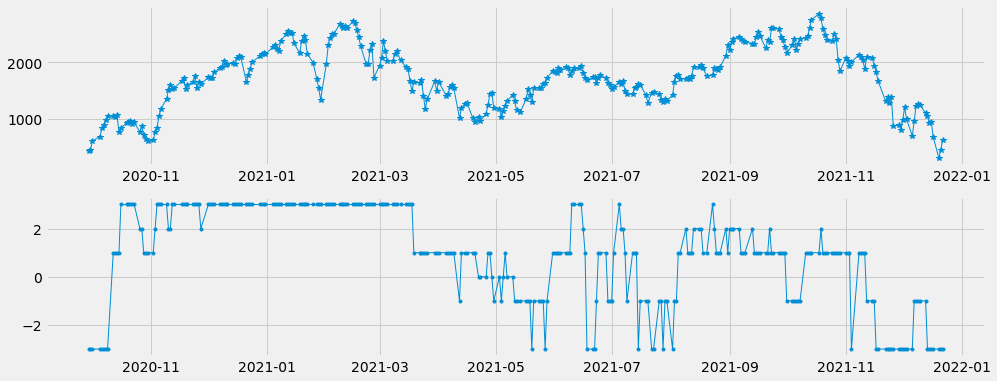

In [1074]:
linplt.lineplot(2,15,6,df,pred['ensemble'], no_of_datapoints=450) # no_of_datapoints=100

In [1075]:
#pred['Signal_from_close']=np.where((pred.Close>pred.Close.shift(1)),1,0)

In [1076]:
#Identifying the buy/sell zone
pred['Buy_ensemble'] = np.where((pred['ensemble']>=0), 1, 0)
pred['Sell_ensemble'] = np.where((pred['ensemble']<0), 0, 1)
#pred['Neutral'] = np.where((pred['ensemble']==-0.5),0,1)
pred['signal4theday']= np.where((pred['ensemble']>0),1,0)

In [1077]:
pred['signalF']=pred['signal4theday']

In [1078]:
pred.to_csv('rf_ta.csv')

In [1079]:
def plot_me_buy_sell_signal(pred,small_period,large_period):
  buy=[]
  sell=[]
  for i in range(len(pred)):
    if pred.loc[:, 'Close'].ewm(span=small_period).mean().iloc[i]>pred.loc[:, 'Close'].ewm(span=large_period).mean().iloc[i] and \
    pred.loc[:, 'Close'].ewm(span=small_period).mean().iloc[i-1]<pred.loc[:, 'Close'].ewm(span=large_period).mean().iloc[i-1]:
      buy.append(i)
    elif pred.loc[:, 'Close'].ewm(span=small_period).mean().iloc[i]<pred.loc[:, 'Close'].ewm(span=large_period).mean().iloc[i] and \
    pred.loc[:, 'Close'].ewm(span=small_period).mean().iloc[i-1]>pred.loc[:, 'Close'].ewm(span=large_period).mean().iloc[i-1]:
      sell.append(i)
  
  return buy,sell

In [1080]:
buy,sell=plot_me_buy_sell_signal(pred,10,30)

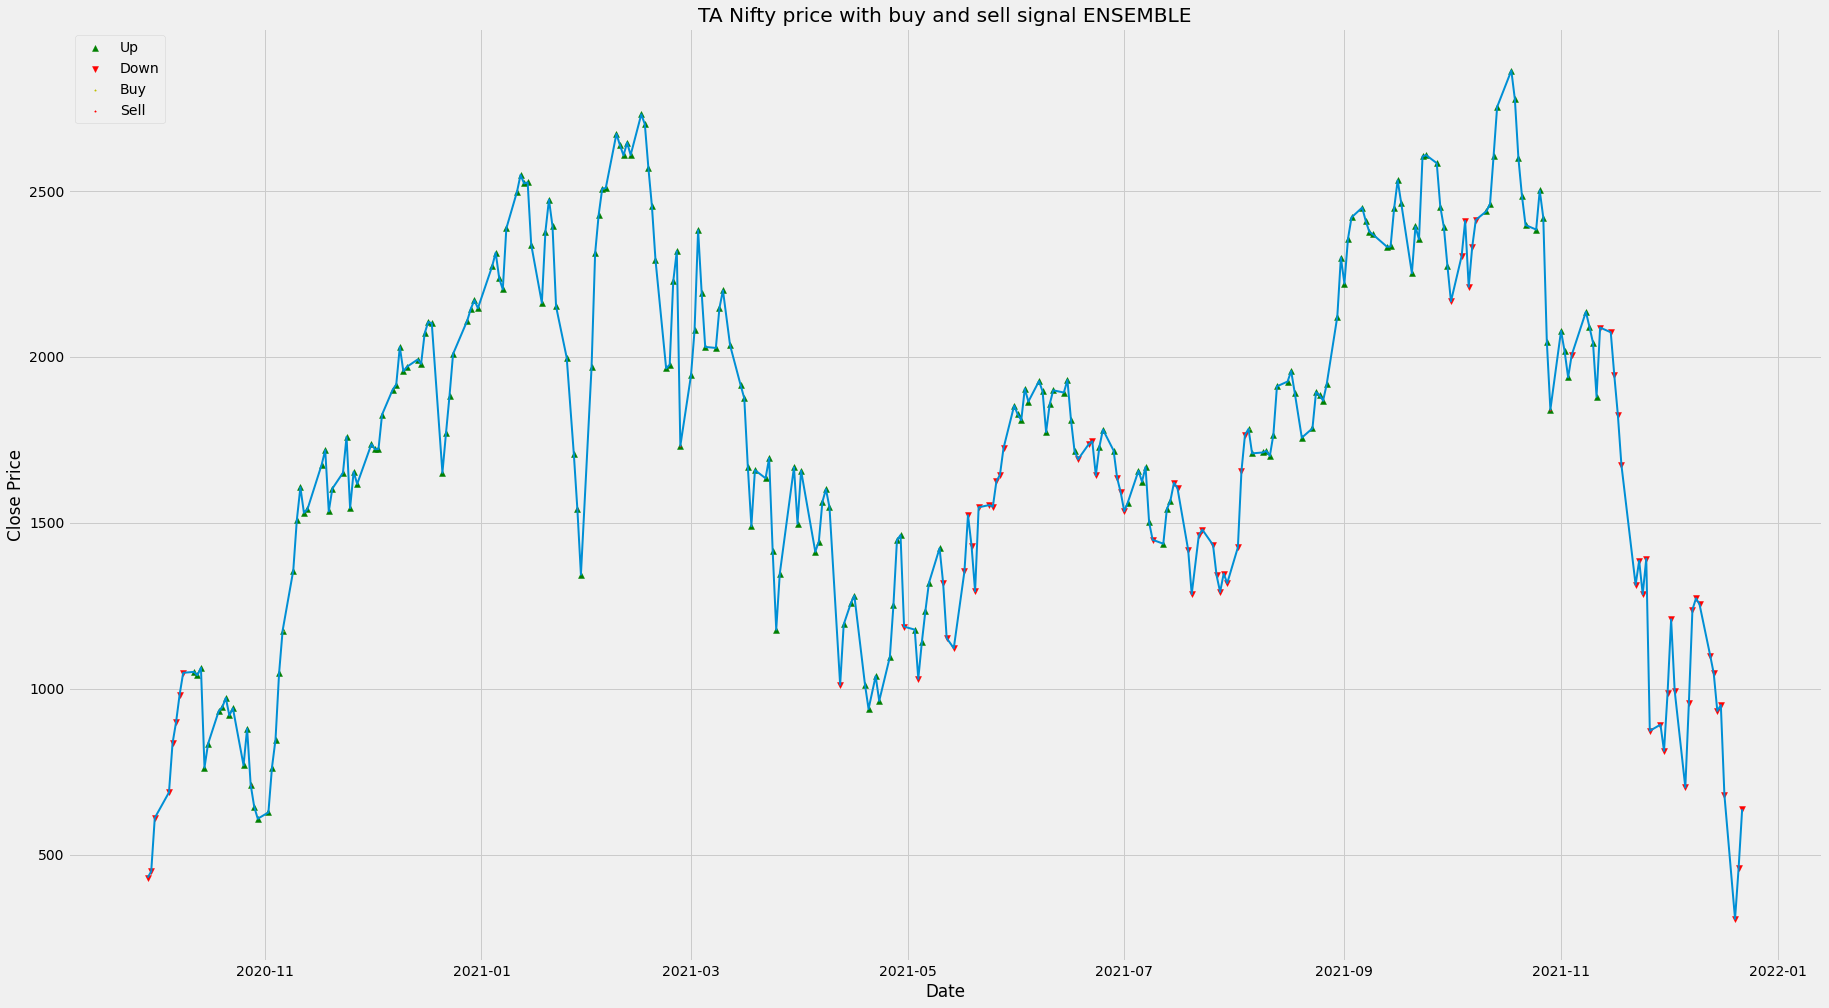

In [1081]:
plt.figure(figsize=(28,16))
## plotting the buy and sell signals on graph
plt.plot(df.index.values[-l:],df['Close'].values[-l:],'-',linewidth=2)
plt.scatter(pred.loc[pred['Buy_ensemble'] ==1 , 'Date'].values,pred.loc[pred['Buy_ensemble'] ==1, 'Close'].values, label='Up', color='green', s=35, marker="^")
plt.scatter(pred.loc[pred['Sell_ensemble'] ==0 , 'Date'].values,pred.loc[pred['Sell_ensemble'] ==0, 'Close'].values, label='Down', color='red', s=35, marker="v")
#plt.scatter(pred.loc[pred['Neutral'] ==0 , 'Date'].values,pred.loc[pred['Neutral'] ==0, 'Close'].values, label='skitscat', color='blue', s=50, marker="*")
plt.scatter(df.iloc[buy][:].index,df.iloc[buy][:].Close,marker='*',s=3,color='y',label='Buy')
plt.scatter(df.iloc[sell][:].index,df.iloc[sell][:].Close,marker='*',s=3,color='r',label='Sell')
#plt.plot(df.index,df['EMA_50'].values[-l:],label='EMA 50')
#plt.plot(df.index,df['EMA_10'].values[-l:], label='EMA 10')

## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price') 
plt.legend(loc='upper left') 
plt.title('TA Nifty price with buy and sell signal ENSEMBLE') 
plt.show();

Accuracy: 85.52631578947368
Percision: 84.34343434343434
Recall: 92.77777777777779
Specificity: 75.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


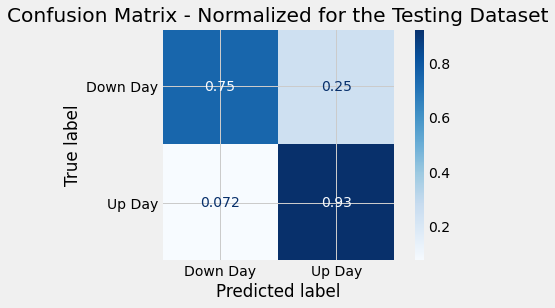

In [1082]:
cm.confus_matrix(df.Signal_Flag,preds,rand_frst_clf,new_data,actuals,plot=True )


Accuracy: 82.38636363636364
Percision: 82.6923076923077
Recall: 86.86868686868688
Specificity: 76.62337662337663


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


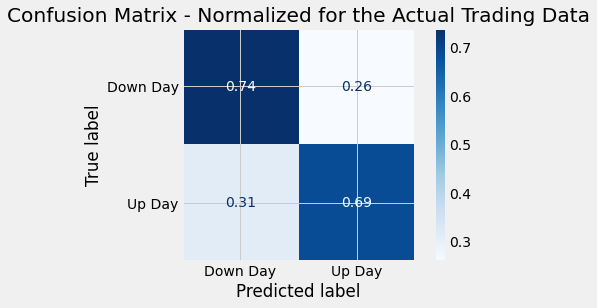

In [1083]:
cm.confus_matrix(y_test,y_pred,rand_frst_clf,X_test,y_test,plot=True, test=False)


In [1084]:
# saving the dataframe
pred[['Date','signalF','Close']].to_csv('/content/rf_TA.csv')

In [1085]:
pred.head(1)

,Date,predsrandom_forest,Close,Buy_ind,Sell_ind,ensemble,Buy_ensemble,Sell_ensemble,signal4theday,signalF
0,2020-09-29,-1.0,431.304965,0,0,-3.0,0,0,0,0


In [1086]:
pred.set_index('Date',inplace=True)

In [1087]:
pred.tail(2)

,predsrandom_forest,Close,Buy_ind,Sell_ind,ensemble,Buy_ensemble,Sell_ensemble,signal4theday,signalF
Date,,,,,,,,,
2021-12-21,-1.0,459.135148,0,0,-3.0,0,0,0,0
2021-12-22,-1.0,637.324741,0,0,-3.0,0,0,0,0


In [1088]:
pred['actual']=np.where(pred.Close>pred.Close.shift(1),1,0)
pred['dummy']= np.where(pred.signal4theday==0,0,1)
pred['dummyS']=pred['dummy'].shift(1)
pred=pred.dropna()

In [1089]:
pred.signalF.value_counts()

1    215
0     88
Name: signalF, dtype: int64

In [1090]:
print(f"Class 0 has {round(pred.dummyS.value_counts()[0]/(pred.dummyS.value_counts()[0]+pred.dummyS.value_counts()[1])*100)}% samples")

Class 0 has 29% samples


In [1091]:
print(f"Class 1 has {round(pred.dummyS.value_counts()[1]/(pred.dummyS.value_counts()[0]+pred.dummyS.value_counts()[1])*100)}% samples")

Class 1 has 71% samples


In [1092]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(pred.actual, pred.dummyS)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]
from sklearn.metrics import average_precision_score,f1_score
average_precision = average_precision_score(pred.actual, pred.dummyS)
f1=f1_score(pred.actual, pred.dummyS,average=None)
accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
f1score= 2*recall*percision/(percision+recall)
print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))
print('F1-Score: {}'.format(float(f1score)))
print('Average Precision : {}'.format(float(average_precision)))
print(f'f1 score class wise for down : {round(f1[0]*100)}.00% ,up : {round(f1[1]*100)}.00%')
accuracy_pos = (true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
accuracy_neg = (true_negatives) / (true_negatives + true_positives + false_negatives + false_positives)
print('Accuracy positive: {}'.format(float(accuracy_pos)))
print('Accuracy negative {}'.format(float(accuracy_neg)))

Accuracy: 0.504950495049505
Percision: 0.5348837209302325
Recall: 0.696969696969697
Specificity: 0.2753623188405797
F1-Score: 0.6052631578947368
Average Precision : 0.5378142465409331
f1 score class wise for down : 34.00% ,up : 61.00%
Accuracy positive: 0.3795379537953795
Accuracy negative 0.1254125412541254


In [1093]:
y_true = pred.actual
y_pred = pred.dummyS
target_names = ['class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.43      0.28      0.34       138
     class 2       0.53      0.70      0.61       165

    accuracy                           0.50       303
   macro avg       0.48      0.49      0.47       303
weighted avg       0.49      0.50      0.48       303



In [1094]:
df_price.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-21,16773.150391,16936.400391,16688.25,16770.849609,16770.849609,241000
2021-12-22,16865.550781,16971.000000,16819.50,16955.449219,16955.449219,0


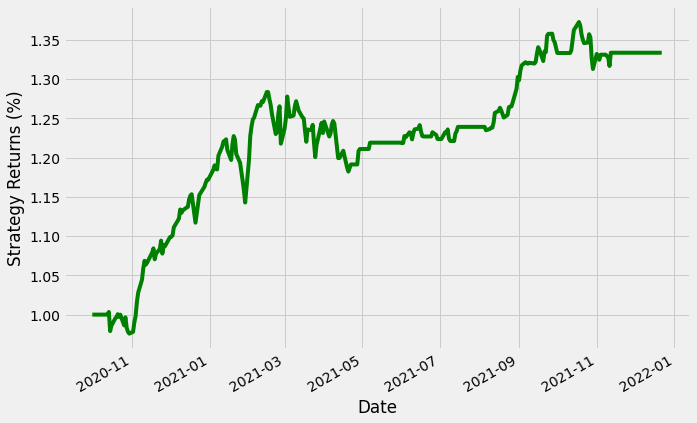

In [1095]:
# Calculate daily returns
df_price['Return'] = df_price.Close.pct_change()

# Calculate strategy returns
pred['Strategy_Return'] = df_price.Return * pred.dummy.shift(1)

# Calculate geometric returns
geometric_returns = (pred.Strategy_Return+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10, 7),color='g')
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

In [1097]:
length=len(geometric_returns)

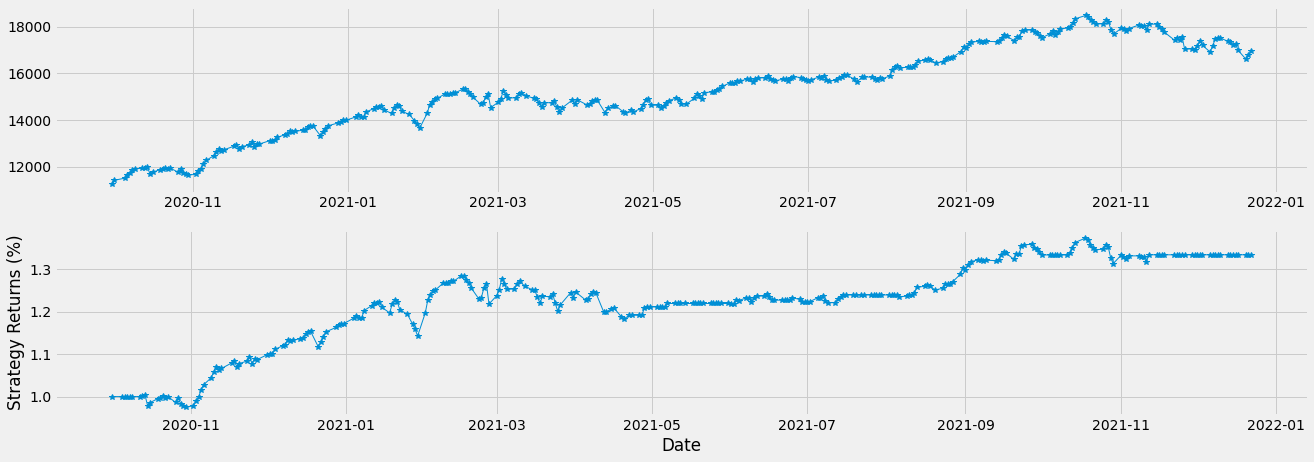

In [1098]:
# Plot geometric returns
fig, ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(df_price.index[-length:],df_price['Close'].values[-length:],'*-',linewidth=1 )
ax[1].plot(geometric_returns,'*-',linewidth=1 )
#pred.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()